## Homework 4

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from utility import GD

In [28]:
def SGD(loss, grad_loss, w0, D, batch_size, n_epochs, learning_rate=1e-3):
    # Initialize the parameters w
    w = w0
        
    # Extract X and y from D
    X, y = D
    
    # Save in memory the length of X (and y)    They have the same dimension
    N = X.shape[-1]
    
    # We assume that batch_size divides N
    # Compute the number of batches per epoch
    
    n_batch_per_epoch = N // batch_size # integer division in case batch_size doesn't divide N
    
    # Iterate over the epochs
    for epoch in range(n_epochs):
        idx = np.arange(N)
        np.random.shuffle(idx)
        
        # Batch iteration
        for k in range(n_batch_per_epoch):
            X_batch = X[idx[k * batch_size : (k+1) * batch_size]]
            y_batch = y[idx[k * batch_size : (k+1) * batch_size]]
            
            B = (X_batch, y_batch) # it should not be necessary to define B.
            
            # Gradient descent update
            # The gradient has to be computed in B, 
            # it cannot be computed on the entire dataset as it will crash!!
            gradient = grad_loss(w, X_batch, y_batch)
            w = w - learning_rate * gradient
                  
        
    return w#, w_history, loss_history, grad_loss_history, err

def fit_MLE_SGD(D, K, lamb=None, min_f=SGD):
    
    X, Y = D
    
    def loss(theta, X, Y):
    
        return (1/(2*sigma**2))*np.linalg.norm(f(theta,X)-Y,2)**2 
#         return (np.linalg.norm(f(theta,X)-Y,2)**2)/2 # i consider this, since sigma is influencing my seek for the minimum
    
    
    def grad_loss(theta, X, Y):
        return (1/sigma**2)*vandermonde(X,K).T@(f(theta,X)-Y) # here sigma seem very important.
#         return vandermonde(X,K).T@(f(theta,X)-Y)
#         return -((vandermonde(X,K).T@Y.T) - (vandermonde(X,K).T@vandermonde(X,K)@theta.T))
    
    
    theta = np.random.normal(a,b,K)
    batch_size = 1_0
    n_epochs = 1000
    theta_sol = min_f(loss, grad_loss, theta, D, batch_size, n_epochs, learning_rate=1e-5)
#     print(f'theta = {theta_sol}')
#     print(f"k: {k}")
#     print(f'error: {err[k]}')
    
    return theta_sol

def plot_data_SGD(ks, fit, lamb):
    error_train, error_test = [],[]
    x_axis = np.linspace(a,b,1000) # for printing the curves

    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.plot(X_train, y_train, '.', alpha=0.25, label="Train data")
    plt.plot(X_test, y_test, '.', alpha=0.5, label="Test data")

    for k in ks:
        theta = fit(D, k, lamb, min_f=SGD)
        plt.plot(x_axis, f(theta, x_axis), '-', label=f'k = {k}')

        # average error part
        error_train.append((np.linalg.norm(f(theta, X_train)-y_train)**2)/X_train.shape[-1])
        error_test.append((np.linalg.norm(f(theta, X_test)-y_test)**2)/X_test.shape[-1])

    plt.title("Data points")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(ks, np.array(error_train), '-', label='Train')
    plt.plot(ks, np.array(error_test), '-', label='Test')
    plt.legend()
    plt.title('Average absolute error')
    plt.show()

In [3]:
def vandermonde(X, K):
    N = X.shape[-1]
    Phi = np.zeros((N, K))
    for k in range(K):
        Phi[:, k] = X**k  
    return Phi

# y = 1 - x^2 + x^3 = [x^0, x^1, x^2, x^3] @ [1, 0, -1, 1]
def f(w, X):
    """
    X is our dataset
    w is the vector of the coefficient of the polinomial
    """
    K = w.shape[-1]
    return vandermonde(X, K) @ w

def create_data(a, b, K, N, sigma):
    e = np.random.normal(0, sigma, (N,))
#     X = np.random.uniform(a,b,N) # entire dataset
    X = np.linspace(a, b, N)
    Y = f(theta_true, X) + e 
    return X, Y

def train_test_split(X, Y, N_train):
    idx = np.arange(0,X.shape[-1])
    np.random.shuffle(idx)
    X_train = X[idx[:N_train]]
    y_train = Y[idx[:N_train]]
    X_test = X[idx[N_train:]]
    y_test =Y[idx[N_train:]]
    
    return X_train, X_test, y_train, y_test

### These 2 are for the MLE

1. Define a test problem in the following way:
- Let the user fix a positive integer K > 0, and define θtrue = (1, 1, . . . , 1)T (you can also consider
different θtrue);
- Define an input dataset X = [x1x2 . . . xN] ∈ RN, where the xi are N uniformly distributed datapoints in the interval [a, b], where a < b are values that the user can select;
- Given a set of functions {ϕ1, ϕ2, . . . , ϕK}, define the Generalized Vandermonde matrix Φ(X) ∈ RN×K, whose element in position i, j is ϕj(xi). In particular, write a function defining the classical Vandermonde matrix where ϕj(x) = xj−1;
- Given a variance σ2 > 0 defined by the user, compute Y = Φ(X)θtrue + e, where e ∼ N(0, σ2I) is Gaussian distributed noise with variance σ2. Try the following experiments for different values of σ2. Note that the test problem defined in this way is very similar to what we did to define a test problem in the first Lab.

2. We now built a dataset D = {X, Y } such that θtrue = (1, 1, . . . , 1)T ∈ RK is the best solution to the least squares problem Φ(X)θ ≈ Y .

## NB it's ok to compute Y with theta true, but the theta to pass to the function to minimize is not theta true! must be theta* to find

In [25]:
a,b = -1, 1
K = 6
N = 100
sigma = 0.2
train_size = 0.8
theta_true = np.ones(K) # the correct solution

X,Y = create_data(a,b,K,N,sigma)
X_train,X_test,y_train,y_test = train_test_split(X,Y,int(train_size*X.shape[-1]))

D = (X_train, y_train) # think to pass it as a param to the function

### READ CAREFULLY, CICO FROM THE FUTURE
for the loss function and grad loss i tried with and without the term involving sigma, since it might worsen the seek for the minimum theta. just try some combination, for now i have to just complete the homework i don't have time for tests.  
It seems that if sigma is little is better to neglect it for avoiding overflow.

In [5]:
def fit_MLE(D, K, lamb=None, min_f=GD):
    
    X, Y = D
    
    def loss(theta):
    
        return (1/(2*sigma**2))*np.linalg.norm(f(theta,X)-Y,2)**2 
#         return (np.linalg.norm(f(theta,X)-Y,2)**2)/2 # i consider this, since sigma is influencing my seek for the minimum
    
    
    def grad_loss(theta):
        return (1/sigma**2)*vandermonde(X,K).T@(f(theta,X)-Y) # here sigma seem very important.
#         return vandermonde(X,K).T@(f(theta,X)-Y)
#         return -((vandermonde(X,K).T@Y.T) - (vandermonde(X,K).T@vandermonde(X,K)@theta.T))
    
    
    theta = np.random.normal(a,b,K)
    kmax = 1_000
    tolf = tolx = 1e-10
    theta_sol, k, theta, f_val, grads, err = min_f(loss, grad_loss, theta, kmax, tolf, tolx, back_tracking=False, alpha=1e-5, multivariate=True)
#     print(f'theta = {theta_sol}')
#     print(f"k: {k}")
#     print(f'error: {err[k]}')
    
    return theta_sol

In [6]:
def fit_MAP(D, K, lamb=0.1, min_f=GD):
    X, Y = D
    
    def loss(theta):
        return (1/(2*sigma**2))*np.linalg.norm(f(theta,X)-Y,2)**2 + (lamb/2)*np.linalg.norm(theta)**2
    
    
    def grad_loss(theta):
        return (1/sigma**2)*vandermonde(X,K).T@(f(theta,X)-Y) + lamb*theta
#         return vandermonde(X,K).T@(f(theta,X)-Y) + lamb*theta
#         return -((vandermonde(X,K).T@Y.T) - (vandermonde(X,K).T@vandermonde(X,K)@theta.T)) + lamb*theta
    
    
    theta = np.random.normal(a,b,K)
    kmax = 1_000
    tolf = tolx = 1e-10
    theta_sol, k, theta, f_val, grads, err = min_f(loss, grad_loss, theta, kmax, tolf, tolx, back_tracking=False, alpha=1e-5, multivariate=True)
    
    return theta_sol

In [7]:
def plot_data(ks, fit, lamb):
    error_train, error_test = [],[]
    x_axis = np.linspace(a,b,1000) # for printing the curves

    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.plot(X_train, y_train, '.', alpha=0.25, label="Train data")
    plt.plot(X_test, y_test, '.', alpha=0.5, label="Test data")

    for k in ks:
        theta = fit(D, k, lamb, min_f=GD)
        plt.plot(x_axis, f(theta, x_axis), '-', label=f'k = {k}')

        # average error part
        error_train.append((np.linalg.norm(f(theta, X_train)-y_train)**2)/X_train.shape[-1])
        error_test.append((np.linalg.norm(f(theta, X_test)-y_test)**2)/X_test.shape[-1])

    plt.title("Data points")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(ks, np.array(error_train), '-', label='Train')
    plt.plot(ks, np.array(error_test), '-', label='Test')
    plt.legend()
    plt.title('Average absolute error')
    plt.show()

In [8]:
def plot_data_varying_lambda(k, lambs):
    error_train, error_test = [],[]
    x_axis = np.linspace(a,b,1000) # for printing the curves

    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.plot(X_train, y_train, '.', alpha=0.25, label="Train data")
    plt.plot(X_test, y_test, '.', alpha=0.5, label="Test data")

    for lamb in lambs:
        theta = fit_MAP(D, k, lamb=lamb, min_f=GD)
        plt.plot(x_axis, f(theta, x_axis), '-', label=f'lambda = {round(lamb,2)}')

        # average error part
        error_train.append((np.linalg.norm(f(theta, X_train)-y_train)**2)/X_train.shape[-1])
        error_test.append((np.linalg.norm(f(theta, X_test)-y_test)**2)/X_test.shape[-1])

    plt.title("Data points")
    plt.legend(fontsize=6)
    
    plt.subplot(1,2,2)
    plt.plot(lambs, np.array(error_train), '-', label='Train')
    plt.plot(lambs, np.array(error_test), '-', label='Test')
    plt.legend()
    plt.title('Average absolute error')
    plt.show()

In [9]:
# here i consider just the test set
def plot_and_compare(ks, lambs):
    plt.figure(figsize=(12,5))
    plt.subplot(2,1,1)
    
    first_lambda = True # in order to compute mle just one time
    error_mle = []
    theta_error_mle = []
    theta_error_map = np.zeros((lambs.shape[-1], len(ks))) # i store the theta error in a n°lambda x n°k matrix

    for i,lamb in enumerate(lambs):
        error_map = []
        
        for j,k in enumerate(ks):
            theta_padded = np.concatenate((theta_true, np.zeros(k-K)), axis=0)
            theta_map = fit_MAP(D, k, lamb=lamb, min_f=GD)
            error_map.append((np.linalg.norm(f(theta_map, X_test)-y_test)**2)/X_test.shape[-1])
            theta_error_map[i,j] = np.linalg.norm(theta_map - theta_padded)/np.linalg.norm(theta_true)
            if first_lambda:
                theta_mle = fit_MLE(D, k, lamb=None, min_f=GD)
                error_mle.append((np.linalg.norm(f(theta_mle, X_test)-y_test)**2)/X_test.shape[-1])
                theta_error_mle.append(np.linalg.norm(theta_mle - theta_padded)/np.linalg.norm(theta_true))
        
        first_lambda = False
        plt.plot(ks, np.array(error_map), '-', label=f'MAP lambda={round(lamb,2)}')
    plt.plot(ks, np.array(error_mle), '--', label='MLE')
    plt.legend()        
    plt.title('MLE vs MAP: Average absolute error (test set)')
    
    plt.subplot(2,1,2)
        
    for j,lamb in enumerate(lambs):
        plt.plot(ks, theta_error_map[j], '-', label=f'MAP lambda={round(lamb,2)}')
    
    plt.plot(ks, np.array(theta_error_mle), '--', label='MLE')
    
    plt.legend()        
    plt.title('MLE vs MAP: Theta error (test set)')
    plt.show()

In [10]:
# here i consider just the test set
def plot_and_compare_varying_N(k, lambs):
    plt.figure(figsize=(12,6))
    plt.subplot(2,1,1)
    Ns = np.arange(100,5100,100)
    first_lambda = True # in order to compute mle just one time
    error_mle = []
    theta_error_mle = []
    theta_error_map = np.zeros((lambs.shape[-1], Ns.shape[-1])) # i store the theta error in a n°lambda x n°Ns matrix
    
    if k <= K:
        k = K + 1 # i want to have the results for k greater than true K so i can compute the theta error

    for i,lamb in enumerate(lambs):
        error_map = []
        for j,N in enumerate(Ns):
            # i create the dataset
            X,Y = create_data(a,b,K,N,sigma)
            X_train,X_test,y_train,y_test = train_test_split(X,Y,int(train_size*X.shape[-1]))
            D = (X_train, y_train)
            
            theta_padded = np.concatenate((theta_true, np.zeros(k-K)), axis=0)
            theta_map = fit_MAP(D, k, lamb=lamb, min_f=GD)
            error_map.append((np.linalg.norm(f(theta_map, X_test)-y_test)**2)/X_test.shape[-1])
            theta_error_map[i,j] = np.linalg.norm(theta_map - theta_padded)/np.linalg.norm(theta_true)
            
            if first_lambda:
                theta_mle = fit_MLE(D, k, lamb=None, min_f=GD)
                error_mle.append((np.linalg.norm(f(theta_mle, X_test)-y_test)**2)/X_test.shape[-1])
                theta_error_mle.append(np.linalg.norm(theta_mle - theta_padded)/np.linalg.norm(theta_true))
        
        first_lambda = False
        plt.plot(Ns, np.array(error_map), '-', label=f'MAP lambda={round(lamb,2)}')
    plt.plot(Ns, np.array(error_mle), '--', label='MLE')
    plt.legend()        
    plt.title('MLE vs MAP: Average absolute error (test set) over N')
    
    plt.subplot(2,1,2)
        
    for j,lamb in enumerate(lambs):
        plt.plot(Ns, theta_error_map[j], '-', label=f'MAP lambda={round(lamb,2)}')
    
    plt.plot(Ns, np.array(theta_error_mle), '--', label='MLE')
    
    plt.legend()        
    plt.title('MLE vs MAP: Theta error (test set) over N')
    plt.show()

## Maximum Likelihood Estimation

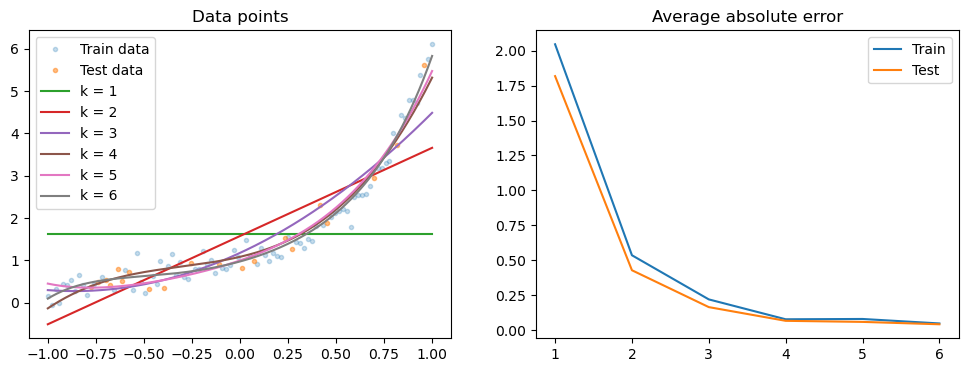

In [11]:
ks = [k for k in range(1,7)]
plot_data(ks, fit_MLE, lamb=None)

## Maximum a Posteriori

Fixed $\lambda$, varying k

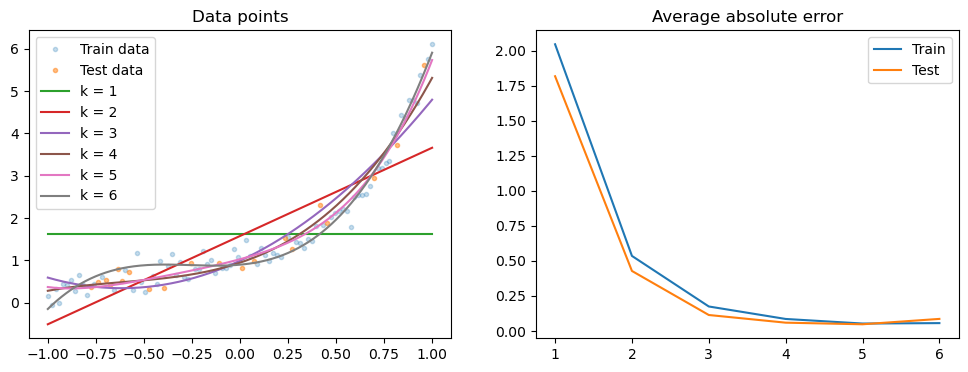

In [12]:
ks = [k for k in range(1,7)]
lamb = 0.2
plot_data(ks, fit_MAP, lamb)

Fixed k, varing $\lambda$  
this plot is weird. does it make sense?

Varying lambda with fixed k = 4


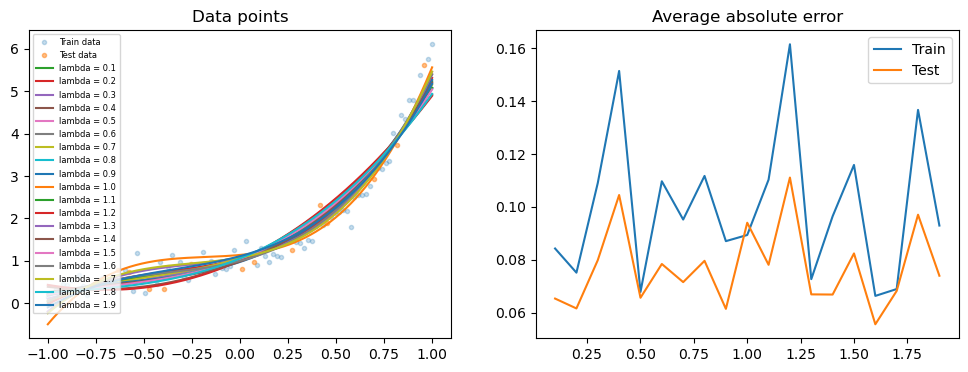

Varying lambda with fixed k = 8


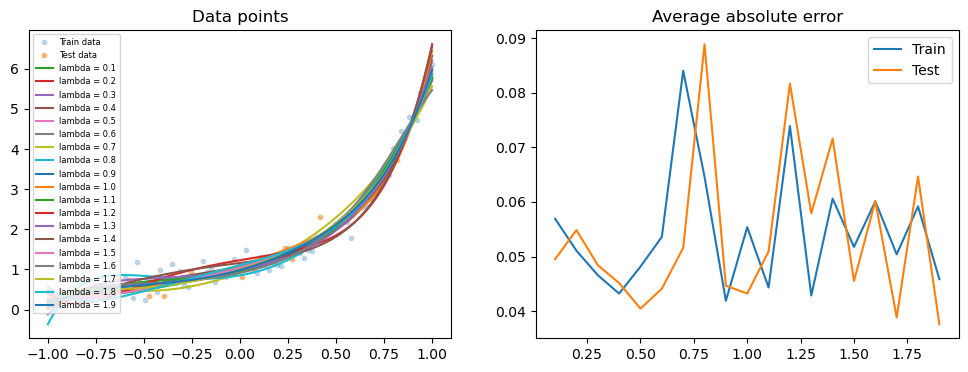

Varying lambda with fixed k = 16


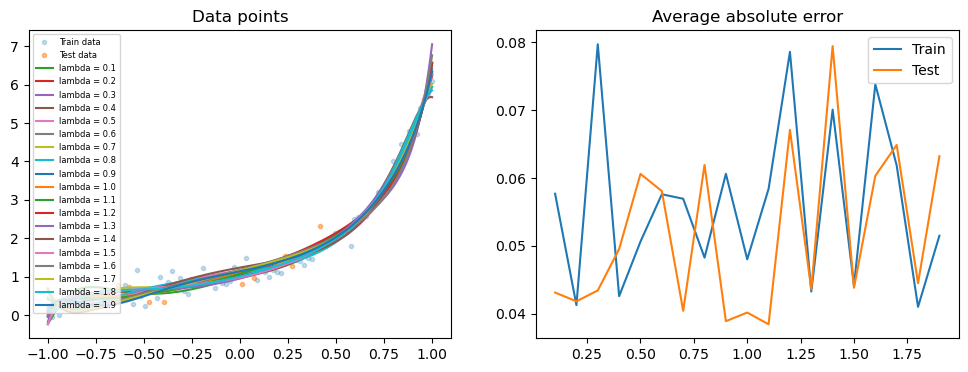

In [13]:
ks = [K-2, K+2, K+10]
lambs = np.arange(0.1,2,0.1)
for k in ks:
    print(f"Varying lambda with fixed k = {k}")
    plot_data_varying_lambda(k, lambs)

plot just the average absolute error for MAP MLE and different lambda values **but for k greater than real K**

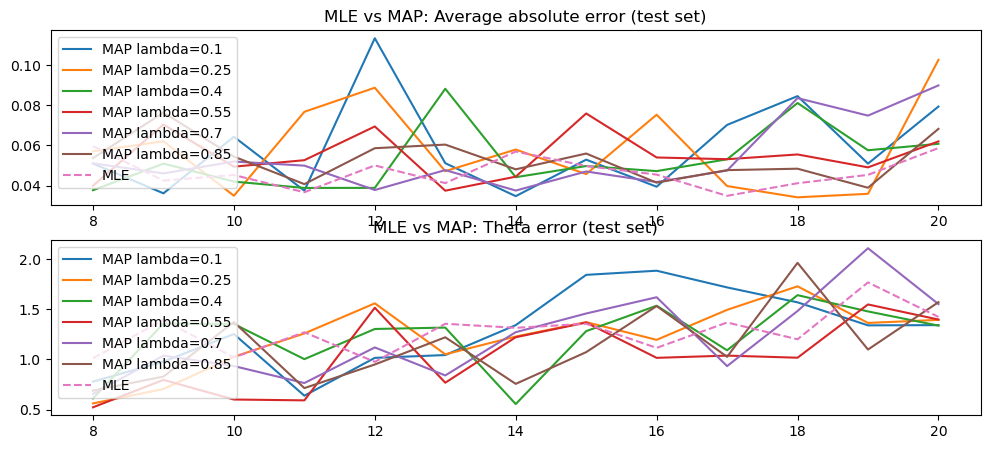

In [14]:
ks = [K + k for k in range(2,15)]
lambs = np.arange(0.1,1,0.15)
plot_and_compare(ks, lambs)

In [15]:
# theta = fit_MLE_SGD

In [ ]:
# k = K+2
# lambs = np.arange(0.1,1,0.15)
# plot_and_compare_varying_N(k, lambs)

## TRY SGD

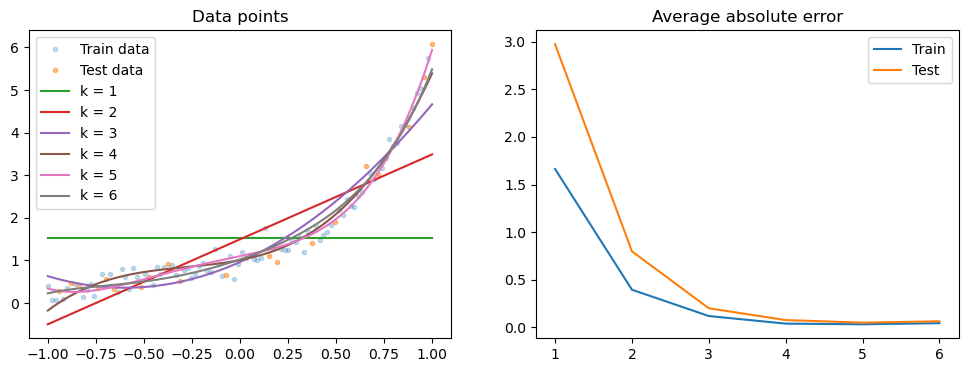

In [29]:
ks = [k for k in range(1,7)]
plot_data_SGD(ks, fit_MLE_SGD, lamb=None)